In [7]:
import pandas as pd
import numpy as np 

In [8]:
df = pd.read_csv('Boston.csv')

In [14]:
df.head()

,crime_rate,zoned_land,industrial_area,near_river,pollution,avg_rooms,old_building_pct,distance_to_city,highway_access,property_tax,student_teacher_ratio,black_population,lower_status_pct,median_value
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

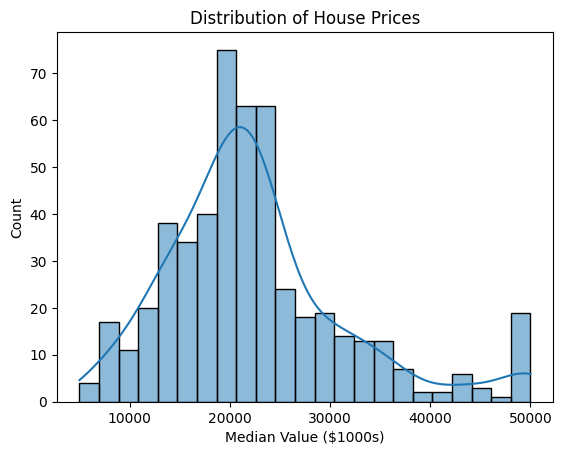

In [67]:
sns.histplot(df['median_value'], kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Median Value ($1000s)")
plt.show()

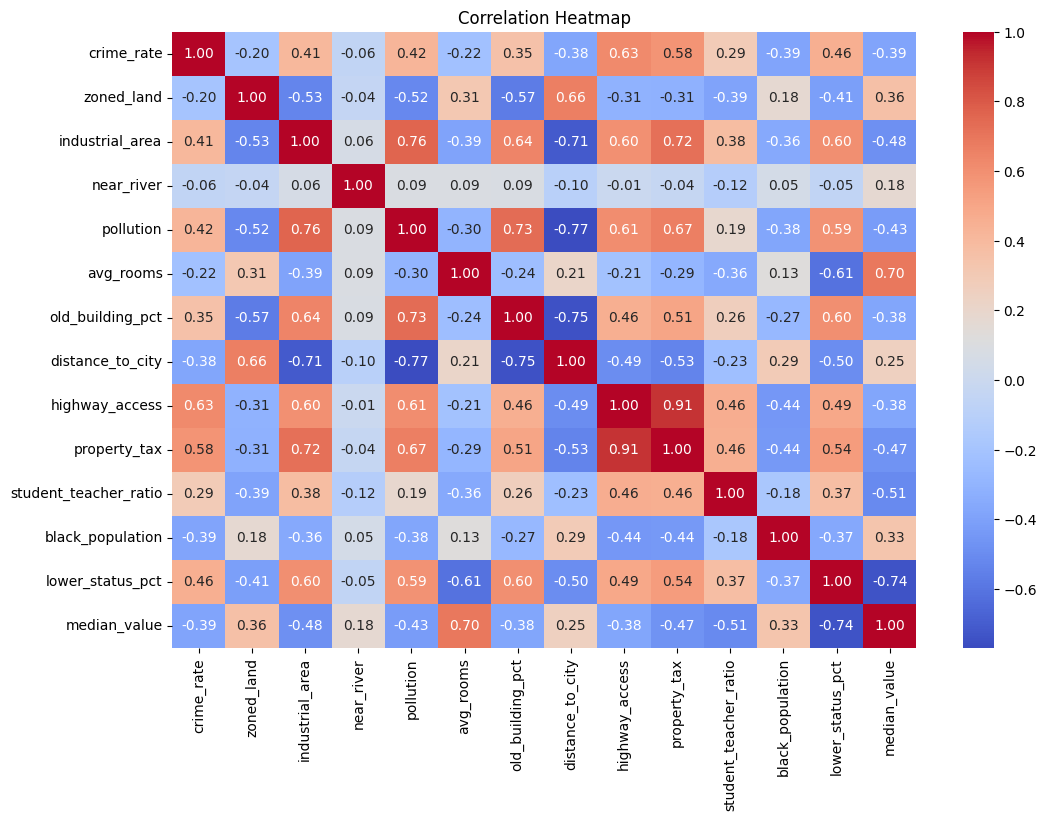

In [69]:
correlation = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


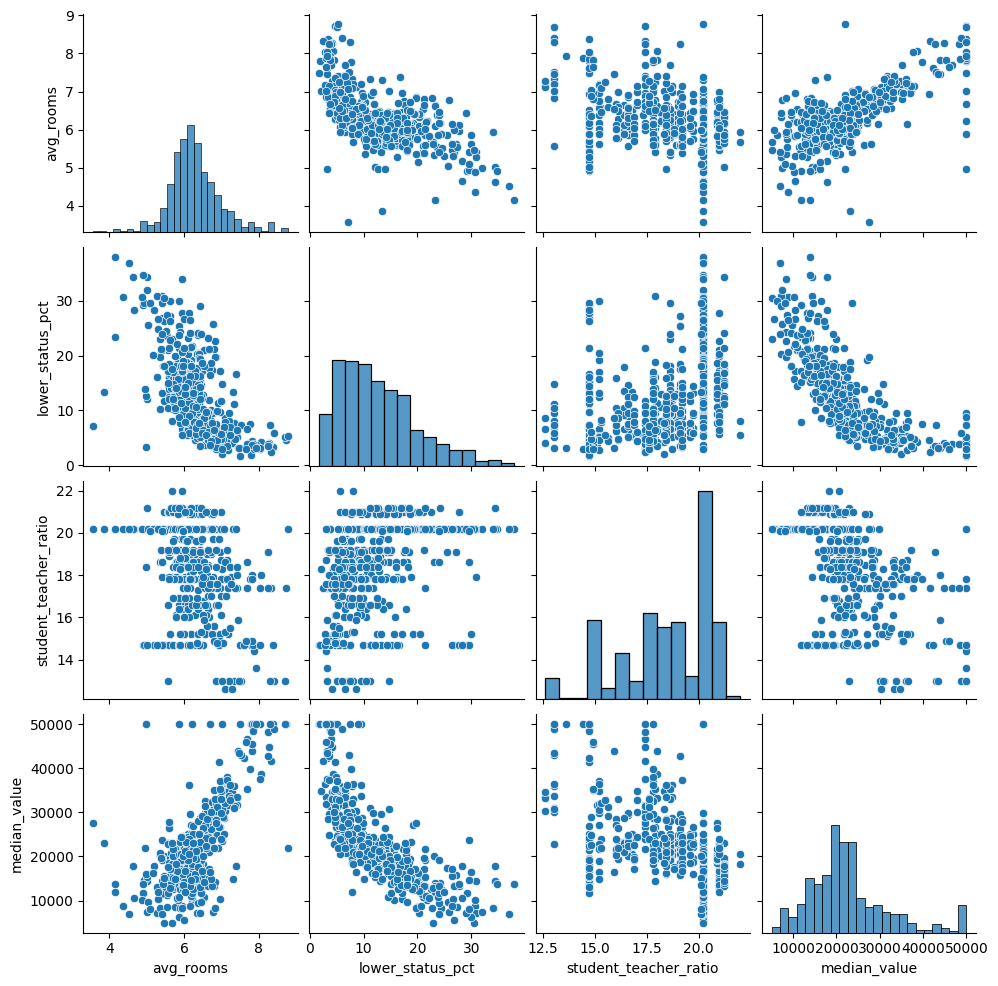

In [71]:
sns.pairplot(df[['avg_rooms', 'lower_status_pct', 'student_teacher_ratio', 'median_value']])
plt.show()

In [ ]:
df.drop('Unnamed: 0', axis = 1,inplace = True)

In [18]:
df['median_value'] = df['median_value'] * 1000

In [10]:
# Rename columns
df.rename(columns={
    "crim": "crime_rate",
    "zn": "zoned_land",
    "indus": "industrial_area",
    "chas": "near_river",
    "nox": "pollution",
    "rm": "avg_rooms",
    "age": "old_building_pct",
    "dis": "distance_to_city",
    "rad": "highway_access",
    "tax": "property_tax",
    "ptratio": "student_teacher_ratio",
    "black": "black_population",
    "lstat": "lower_status_pct",
    "medv": "median_value"
}, inplace=True)

In [41]:
X = df.iloc[:,:-1]

In [43]:
Y = df.iloc[:,-1]

In [46]:
from sklearn.model_selection import train_test_split

In [75]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
model = LinearRegression()

In [78]:
model.fit(x_train,y_train)

LinearRegression()

In [79]:
model.score(x_test,y_test)

0.6687594935356308

In [85]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error


In [90]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(x_train)
X_test_poly = poly.transform(x_test)



In [86]:
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)


In [87]:
model = LinearRegression()
model.fit(X_train_poly_scaled, y_train)


LinearRegression()

In [89]:
model.score(X_test_poly_scaled, y_test)


0.8055829447972203

In [92]:
model.intercept_

22796.53465346549

# Pickel the model

In [94]:
import pickle

In [96]:
with open('Model','wb') as file:
    pickle.dump(model,file)

In [98]:
with open('Model','rb') as file:
    model1 = pickle.load(file)

In [100]:
model1.score(X_test_poly_scaled, y_test)

0.8055829447972203

In [102]:
df.head()

,crime_rate,zoned_land,industrial_area,near_river,pollution,avg_rooms,old_building_pct,distance_to_city,highway_access,property_tax,student_teacher_ratio,black_population,lower_status_pct,median_value
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24000.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21600.0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34700.0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33400.0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36200.0


In [113]:
# One sample (same order as X_train columns)
# Example values: crime_rate, zoned_land, industrial_area, near_river, pollution, avg_rooms, ...
new_data = [[12, 25, 5.0, 1, 0.45, 6.5, 30, 5.0, 4, 300, 15, 390, 6.0]]


In [114]:
# 1. Convert to DataFrame
new_df = pd.DataFrame(new_data, columns=X.columns)

# 2. Apply same transformations
new_poly = poly.transform(new_df)
new_poly_scaled = scaler.transform(new_poly)

# 3. Predict
predicted_price = model.predict(new_poly_scaled)

print(f"Predicted House Price: ${predicted_price[0]*1000:.2f}")


Predicted House Price: $36461893.49
